In [2]:
import numpy as np
import matplotlib.pyplot as plt

time_len = 96
# 创建随机的时间序列数据，长度为time_len，数值范围在0-20之间
np.random.seed(0)
values = np.random.randn(time_len).cumsum()
# values = np.random.randn(time_len).cumsum()
time_len_half = time_len // 2

In [3]:
# 生成一个预测结果，在原有数据的基础上加上一个随机数，均值为0，方差为2。从x=100开始

bias = np.random.normal(0, 4, time_len_half)
pred_values = values[time_len_half:]-3 + bias
# 平滑处理, 5个数据取平均,长度不变
pred_values = np.convolve(pred_values, np.ones(6)/6, mode='same')
pred_values = np.concatenate([np.array([None]*time_len_half), pred_values])
pred_values[time_len_half] = values[time_len_half]
pred_values[time_len_half+1] = values[time_len_half+1]
pred_values_high = np.array(pred_values[time_len_half:] + 3, dtype=float)
pred_values_low = np.array(pred_values[time_len_half:] - 3, dtype=float)


pred_values_wrongs = []
for i in range(4):
    bias = np.random.normal(0, 2, time_len_half)
    # 生成一个-10到10之间的随机数
    random_num = np.random.uniform(-10, 10)
    if i == 0:
        pred_values_wrong = 5 - values[time_len_half:] + random_num + bias
    else:
        pred_values_wrong = values[time_len_half:] + random_num + bias
    # 平滑处理, 5个数据取平均,长度不变
    pred_values_wrong = np.convolve(pred_values_wrong, np.ones(6)/6, mode='same')
    pred_values_wrong = np.concatenate([np.array([None]*time_len_half), pred_values_wrong])
    pred_values_wrong[time_len_half] = values[time_len_half]
    pred_values_wrong[time_len_half+1] = values[time_len_half+1]
    pred_values_wrongs.append(pred_values_wrong)




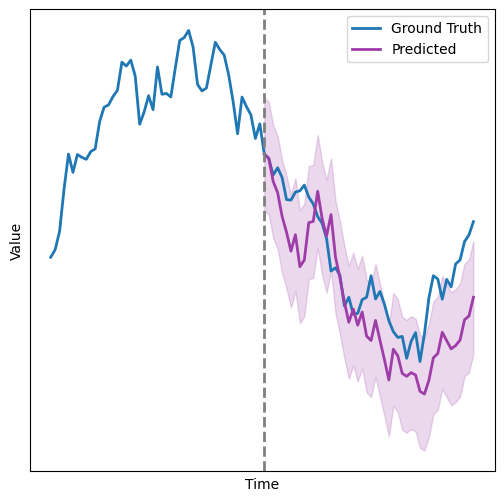

In [4]:
# 绘制时间序列图像
plt.figure(figsize=(6, 6))
plt.plot(values,linewidth=2, label='Ground Truth')
plt.plot(pred_values,linewidth=2, label='Predicted', color='#9e3ca8')


plt.xlabel('Time')
plt.ylabel('Value')
# 不显示x轴的刻度
plt.xticks([])
plt.yticks([])
plt.legend()
# 在图上100，200的区域添加一个区域，y轴的范围是-10到10
plt.fill_between(np.arange(time_len_half, time_len), pred_values_high, pred_values_low, alpha=0.2,color='#9e3ca8')

# 在x = 100的位置添加一条竖直虚线
plt.axvline(time_len_half, linestyle='--', linewidth=2, color='grey')
plt.savefig('time_series.png', dpi=300, bbox_inches='tight')
plt.savefig('time_series.svg', format='svg', dpi=300, bbox_inches='tight')

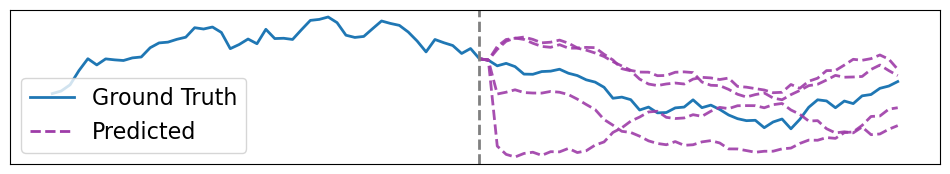

In [8]:
# 绘制时间序列图像
plt.figure(figsize=(12, 2))
plt.plot(values,linewidth=2, label='Ground Truth')
# plt.plot(pred_values,linewidth=2, label='Predicted', color='#9e3ca8')

for i, pred_values_wrong in enumerate(pred_values_wrongs):
    # plt.plot(pred_values_wrong,linewidth=2, alpha=0.9,color='#9e3ca8')
    plt.plot(pred_values_wrong,linewidth=2, alpha=0.9, linestyle='--',color='#9e3ca8')
plt.plot([None]*time_len_half,linewidth=2, label='Predicted', color='#9e3ca8', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Value')
# 不显示x轴的刻度
plt.xticks([])
plt.yticks([])
plt.legend()
# 在图上100，200的区域添加一个区域，y轴的范围是-10到10
# plt.fill_between(np.arange(time_len_half, time_len), pred_values_high, pred_values_low, alpha=0.2,color='#9e3ca8')
# 字号
plt.rcParams.update({'font.size': 16})
# 在x = 100的位置添加一条竖直虚线
plt.axvline(time_len_half, linestyle='--', linewidth=2, color='grey')
plt.savefig('time_series_wrong.png', dpi=300, bbox_inches='tight')
plt.savefig('time_series_wrong.svg', format='svg', bbox_inches='tight')

